* Github: [https://github.com/Laoannnnn/DataMining2](https://github.com/Laoannnnn/DataMining2)  
* Dataset: [Consumer & Visitor Insights For Neighborhoods](https://www.kaggle.com/safegraph/visit-patterns-by-census-block-group)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "../Dataset/visit-patterns-by-census-block-group/cbg_patterns.csv"
df = pd.read_csv(file_path)
# df.head()

# 数据处理
对数据集进行处理，转换成适合进行关联规则挖掘的形式。  
通过对数据集进行观察可以发现，**related_same_day_brand**和**related_same_month_brand**两个属性的形式适合进行关联规则挖掘。则分别提取两列数据，并依次命名为**day**和**month**：

In [3]:
day = pd.DataFrame(df, columns=['related_same_day_brand'])
month = pd.DataFrame(df, columns=['related_same_month_brand'])

这两个属性中均存在无效值：`[]`，这里选择将其删除，并将DataFrame转为**list**方便后续计算：

In [4]:
day1 = day.drop(day[day.related_same_day_brand=='[]'].index)
day1.reset_index(drop=True, inplace=True)
# to list
day_list = []
for i in day1.related_same_day_brand:
    brand = []
    i = i.strip('[]')
    i = i.split(',')  # to list
    for j in i:
        brand.append(j.strip('""').strip(' '))
    day_list.append(brand)

In [5]:
month1 = month.drop(month[month.related_same_month_brand=='[]'].index)
month1.reset_index(drop=True, inplace=True)
month_list = []
for i in month1.related_same_month_brand:
    brand = []
    i = i.strip('[]')
    i = i.split(',')  # to list
    for j in i:
        brand.append(j.strip('""').strip(' '))
    month_list.append(brand)

# 频繁模式挖掘
采用**Apriori算法**。  
由于数据量较多，根据实际情况**min_sup**的设置如下：  

| dataset | minSupport |
| :--: | :--: |
| related_same_day_brand | 5% |
| related_same_month_brand | 20% |

In [6]:
def createC1(dataset):  # 产生单个item的集合
    C1 = []
    for transaction in dataset:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return map(frozenset, C1)  # 给C1.list每个元素执行函数

def scanD(D, ck, minSupport):  # dataset,a list of candidate set,最小支持率 支持度计数
    ssCnt = {}
    # temp_D = list(D)
    numItem = float(len(D))
    # print('numItem:', numItem)
    temp_ck = list(ck)
    for tid in D:
        for can in temp_ck:
            if can.issubset(tid):
                if can not in ssCnt:
                    ssCnt[can] = 1
                else:
                    ssCnt[can] += 1
    retList = []
    supportData = {}
    for key in ssCnt:
        if numItem == 0:
            continue
        support = ssCnt[key] / numItem  # 支持度
        if support >= minSupport:            
            retList.insert(0, key)
            supportData[key] = support
    return retList, supportData  # 返回频繁k项集，相应支持度

def aprioriGen(Lk, k):  # create ck(k项集)
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(Lk[i])[:k - 2]
            L2 = list(Lk[j])[:k - 2]
            L1.sort()
            L2.sort()  # 排序
            if L1 == L2:  # 比较i,j前k-1个项若相同，和合并它俩
                retList.append(Lk[i] | Lk[j])  # 加入新的k项集 | stanf for union
    return retList # ck

def apriori(datset, minSupport):
    C1 = createC1(datset)  # map
    D = datset
    L1, supportData = scanD(D, C1, minSupport)  # 利用k项集生成频繁k项集, 即满足最小支持率的k项集
    L = [L1]  # L保存所有频繁项集

    k = 2
    while (len(L[k - 2]) > 0):  # 直到频繁k-1项集为空
        Ck = aprioriGen(L[k - 2], k)  # 利用频繁k-1项集 生成k项集
        Lk, supK = scanD(D, Ck, minSupport)
        supportData.update(supK)  # 保存新的频繁项集与其支持度
        L.append(Lk)  # 保存频繁k项集
        k += 1
    return L, supportData  # 返回所有频繁项集，与其相应的支持率

# dataset = [['Beer', 'Nuts', 'Diaper'],['Beer', 'Coffee', 'Diaper'],
#            ['Beer', 'Diaper', 'Eggs'],['Nuts', 'Eggs', 'Milk'],['Nuts', 'Coffee', 'Diaper', 'Eggs', 'Milk']]

## related_same_day_brand

In [7]:
minSupport = 0.05
day_L, day_suppData = apriori(day_list,minSupport)
for i in range(len(day_L)-1):
    print('频繁', i+1, '项集')
    print(day_L[i])
# print(L)

频繁 1 项集
[frozenset({"Dunkin' Donuts"}), frozenset({'7-Eleven US'}), frozenset({'Sonic'}), frozenset({'QuikTrip'}), frozenset({'starbucks'}), frozenset({'Dollar General'}), frozenset({'Shell Oil'}), frozenset({'walmart'}), frozenset({'mcdonalds'})]
频繁 2 项集
[frozenset({'walmart', 'Dollar General'}), frozenset({'walmart', 'mcdonalds'})]


## related_same_month_brand

In [8]:
minSupport = 0.2
month_L, month_suppData = apriori(month_list,minSupport)
for i in range(len(month_L)-1):
    print('频繁', i+1, '项集')
    print(month_L[i])

频繁 1 项集
[frozenset({'BP'}), frozenset({"Dunkin' Donuts"}), frozenset({'7-Eleven US'}), frozenset({'Target'}), frozenset({'Walgreens'}), frozenset({'starbucks'}), frozenset({'Chevron'}), frozenset({'walmart'}), frozenset({'mcdonalds'}), frozenset({'Shell Oil'}), frozenset({'SUBWAY'}), frozenset({'Dollar General'}), frozenset({'Chick-fil-A'})]
频繁 2 项集
[frozenset({'mcdonalds', 'BP'}), frozenset({"Dunkin' Donuts", 'mcdonalds'}), frozenset({'mcdonalds', 'Target'}), frozenset({'mcdonalds', 'Walgreens'}), frozenset({'SUBWAY', 'starbucks'}), frozenset({'mcdonalds', 'starbucks'}), frozenset({'walmart', 'starbucks'}), frozenset({'mcdonalds', 'Chevron'}), frozenset({'mcdonalds', 'Chick-fil-A'}), frozenset({'mcdonalds', 'Dollar General'}), frozenset({'mcdonalds', 'SUBWAY'}), frozenset({'mcdonalds', 'Shell Oil'}), frozenset({'walmart', 'Chick-fil-A'}), frozenset({'walmart', 'Dollar General'}), frozenset({'walmart', 'SUBWAY'}), frozenset({'walmart', 'Shell Oil'}), frozenset({'walmart', 'mcdonalds'})

# 导出关联规则，计算其支持度和置信度
由于数据量较多，根据实际情况**min_sup**的设置如下：  

| dataset | minConf |
| :--: | :--: |
| related_same_day_brand | 20% |
| related_same_month_brand | 50% |

## 支持度
支持度在上一部分找出频繁模式时已计算:

In [9]:
print("related_same_day_brand:")
for k, v in day_suppData.items():
    print(k, ':', v)
print("\nrelated_same_month_brand:")
for k, v in month_suppData.items():
    print(k, ':', v)

related_same_day_brand:
frozenset({'mcdonalds'}) : 0.2508572138255766
frozenset({'walmart'}) : 0.23403692364182233
frozenset({'Shell Oil'}) : 0.06819912199705172
frozenset({'Dollar General'}) : 0.09602954755309326
frozenset({'starbucks'}) : 0.07358809458240863
frozenset({'QuikTrip'}) : 0.053733132461810114
frozenset({'Sonic'}) : 0.055061476405695677
frozenset({'7-Eleven US'}) : 0.05002888878089345
frozenset({"Dunkin' Donuts"}) : 0.11324402110230948
frozenset({'walmart', 'mcdonalds'}) : 0.08685533470487546
frozenset({'walmart', 'Dollar General'}) : 0.0519566074311664

related_same_month_brand:
frozenset({'Chick-fil-A'}) : 0.21607149417686175
frozenset({'Dollar General'}) : 0.2802454168044381
frozenset({'SUBWAY'}) : 0.4816304787097248
frozenset({'Shell Oil'}) : 0.3581138175539145
frozenset({'mcdonalds'}) : 0.9480418090304567
frozenset({'walmart'}) : 0.7547439288732135
frozenset({'Chevron'}) : 0.21529078952202504
frozenset({'starbucks'}) : 0.41178037400345346
frozenset({'Walgreens'}) : 0.

## 置信度 & 关联规则
计算出置信度的同时，将关联规则导入.txt文件中。

In [10]:
def calcConf(freqSet, H, supportData, brl, minConf):
    prunedH = []
    lift = []
    file = open("generate_rules.txt","a",encoding = "utf-8")
    for conseq in H:  # 后件中的每个元素
        conf = supportData[freqSet] / supportData[freqSet - conseq]
        if conf >= minConf:
            file.write(str(freqSet - conseq)+"-->"+str(conseq)+" support:"+str(supportData[freqSet])+" conf:"+str(conf)+'\n')
            brl.append((freqSet - conseq, conseq, supportData[freqSet], conf))  # 添加入规则集中
            prunedH.append(conseq)  # 添加入被修剪过的H中
    file.close()
    return prunedH

def rulesFromConseq(freqSet, H, supportData, brl, minConf):
    m = len(H[0])  # H是一系列后件长度相同的规则，所以取H0的长度即可
    if (len(freqSet) > m + 1):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

def generateRules(L, supportData, minConf):
    bigRuleList = []  # 存储规则
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

### related_same_day_brand

In [11]:
day_rules = generateRules(day_L, day_suppData, minConf=0.2)
for item in day_rules:
    print(item)

(frozenset({'Dollar General'}), frozenset({'walmart'}), 0.0519566074311664, 0.5410481331533963)
(frozenset({'walmart'}), frozenset({'Dollar General'}), 0.0519566074311664, 0.22200175349545473)
(frozenset({'mcdonalds'}), frozenset({'walmart'}), 0.08685533470487546, 0.3462341520115375)
(frozenset({'walmart'}), frozenset({'mcdonalds'}), 0.08685533470487546, 0.37111808407549257)


### related_same_month_brand

In [12]:
month_rules = generateRules(month_L, month_suppData, minConf=0.5)
for item in month_rules:
    print(item)

(frozenset({'BP'}), frozenset({'mcdonalds'}), 0.20739189536720673, 0.9857894392176552)
(frozenset({"Dunkin' Donuts"}), frozenset({'mcdonalds'}), 0.22588541092619127, 0.9499410958110431)
(frozenset({'Target'}), frozenset({'mcdonalds'}), 0.2385052720526103, 0.957291897072919)
(frozenset({'Walgreens'}), frozenset({'mcdonalds'}), 0.2264686432271575, 0.9775020317548416)
(frozenset({'starbucks'}), frozenset({'mcdonalds'}), 0.3933190051067269, 0.955166952914148)
(frozenset({'starbucks'}), frozenset({'walmart'}), 0.23754546456519343, 0.5768741775031785)
(frozenset({'Chevron'}), frozenset({'mcdonalds'}), 0.2013621000036739, 0.9353029010238909)
(frozenset({'Chick-fil-A'}), frozenset({'mcdonalds'}), 0.21132756530364818, 0.9780446333687567)
(frozenset({'Dollar General'}), frozenset({'mcdonalds'}), 0.2741513281163893, 0.9782544572627163)
(frozenset({'SUBWAY'}), frozenset({'mcdonalds'}), 0.47428267019361475, 0.9847438880201381)
(frozenset({'mcdonalds'}), frozenset({'SUBWAY'}), 0.47428267019361475, 0

# 对规则进行评价
可使用Lift、卡方和其它教材中提及的指标, 至少2种。
## Lift(提升度)
$$Lift(A,B) = \frac{s(A \cup B)}{s(A)\times s(B)}=\frac{c(A \rightarrow B)}{s(B)}$$
提升度小于1为负相关；提升度大于1为正相关；提升度等于1为不相关

In [13]:
def lift_eval(rules, suppData): # lift evaluation
    # lift(A, B) = P(A交B) / (P(A) * P(B)) = P(A) * P(B | A) / (P(A) * P(B)) = P(B | A) / P(B) = confidence(A— > B) / support(B) = confidence(B— > A) / support(A)
    lift = []
    for rule in rules:
        freqSet_conseq = rule[0]
        conseq = rule[1]
        lift_val = float(rule[3]) / float(suppData[rule[1]])
        lift.append([freqSet_conseq, conseq, lift_val])
    return lift

### related_same_day_brand

In [14]:
day_lifts = lift_eval(day_rules, day_suppData)
for item in day_lifts:
    print(item)

[frozenset({'Dollar General'}), frozenset({'walmart'}), 2.3118067214959375]
[frozenset({'walmart'}), frozenset({'Dollar General'}), 2.3118067214959375]
[frozenset({'mcdonalds'}), frozenset({'walmart'}), 1.4793996888346792]
[frozenset({'walmart'}), frozenset({'mcdonalds'}), 1.4793996888346792]


### related_same_month_brand

In [15]:
month_lifts = lift_eval(month_rules, month_suppData)
for item in month_lifts:
    print(item)

[frozenset({'BP'}), frozenset({'mcdonalds'}), 1.0398164193051804]
[frozenset({"Dunkin' Donuts"}), frozenset({'mcdonalds'}), 1.0020033787144143]
[frozenset({'Target'}), frozenset({'mcdonalds'}), 1.009757046529332]
[frozenset({'Walgreens'}), frozenset({'mcdonalds'}), 1.03107481383602]
[frozenset({'starbucks'}), frozenset({'mcdonalds'}), 1.007515643103312]
[frozenset({'starbucks'}), frozenset({'walmart'}), 0.7643309941749599]
[frozenset({'Chevron'}), frozenset({'mcdonalds'}), 0.9865629259329886]
[frozenset({'Chick-fil-A'}), frozenset({'mcdonalds'}), 1.0316471531661493]
[frozenset({'Dollar General'}), frozenset({'mcdonalds'}), 1.0318684766267403]
[frozenset({'SUBWAY'}), frozenset({'mcdonalds'}), 1.0387135658365279]
[frozenset({'mcdonalds'}), frozenset({'SUBWAY'}), 1.0387135658365276]
[frozenset({'Shell Oil'}), frozenset({'mcdonalds'}), 1.019393110981909]
[frozenset({'Chick-fil-A'}), frozenset({'walmart'}), 1.2614507081505129]
[frozenset({'Dollar General'}), frozenset({'walmart'}), 1.287564

## Cosine(余弦度量)
$$Cosine=\frac{s(A \cup B)}{\sqrt{s(A) \times s(B)}}=\frac{s(A \cup B) \times s(A)}{s(A)\times\sqrt{s(A) \times s(B)}}=c(A \rightarrow B)\times\frac{s(A)}{\sqrt{s(A) \times s(B)}}$$
取值范围是\[0,1\]，0表示不相关，1表示相关，0.5表示中性

In [16]:
def cos_eval(rules, suppData): # allconf evaluation
    cos = []
    for rule in rules:
        freqSet_conseq = rule[0]
        conseq = rule[1]
        cos_val = (float(rule[3])*float(suppData[rule[0]])) / pow(float(suppData[rule[0]])*float(suppData[rule[1]]), 1/2)
        cos.append([freqSet_conseq, conseq, cos_val])
    return cos

### related_same_day_brand

In [17]:
day_cos = cos_eval(day_rules, day_suppData)
for item in day_cos:
    print(item)

[frozenset({'Dollar General'}), frozenset({'walmart'}), 0.3465741396663869]
[frozenset({'walmart'}), frozenset({'Dollar General'}), 0.3465741396663869]
[frozenset({'mcdonalds'}), frozenset({'walmart'}), 0.35846025600619197]
[frozenset({'walmart'}), frozenset({'mcdonalds'}), 0.35846025600619197]


### related_same_month_brand

In [18]:
month_cos = cos_eval(month_rules, month_suppData)
for item in month_cos:
    print(item)

[frozenset({'BP'}), frozenset({'mcdonalds'}), 0.4643807683718648]
[frozenset({"Dunkin' Donuts"}), frozenset({'mcdonalds'}), 0.47574987645856254]
[frozenset({'Target'}), frozenset({'mcdonalds'}), 0.4907467565756483]
[frozenset({'Walgreens'}), frozenset({'mcdonalds'}), 0.48322470358533764]
[frozenset({'starbucks'}), frozenset({'mcdonalds'}), 0.629503812835839]
[frozenset({'starbucks'}), frozenset({'walmart'}), 0.4261025241568829]
[frozenset({'Chevron'}), frozenset({'mcdonalds'}), 0.4457088540197912]
[frozenset({'Chick-fil-A'}), frozenset({'mcdonalds'}), 0.46692127937270345]
[frozenset({'Dollar General'}), frozenset({'mcdonalds'}), 0.5318722716110102]
[frozenset({'SUBWAY'}), frozenset({'mcdonalds'}), 0.701885919200036]
[frozenset({'mcdonalds'}), frozenset({'SUBWAY'}), 0.701885919200036]
[frozenset({'Shell Oil'}), frozenset({'mcdonalds'}), 0.5939720080781343]
[frozenset({'Chick-fil-A'}), frozenset({'walmart'}), 0.5094116075051586]
[frozenset({'Dollar General'}), frozenset({'walmart'}), 0.5

# 可视化
## 网络关系图
支持度越大，节点越大。

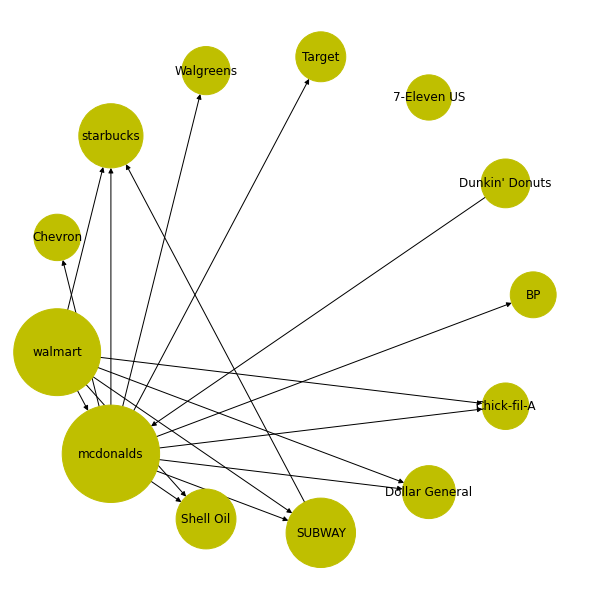

In [19]:
import networkx as nx 
plt.figure(figsize=(8, 8))
G = nx.DiGraph()  #创建空的网络图
node_size = []
for node in month_L[0]:
    node_size.append(int(month_suppData[node]*10000))
    n = list(set(node))
    G.add_node(n[0])  # 添加点  
for nodes in month_L[1]:
    n = list(set(nodes))
    a, b = n[0], n[1]
    G.add_edge(a, b)
pos = nx.shell_layout(G)
nx.draw(G, pos, node_color='y', with_labels = True, node_size=node_size)
plt.show()

## 散点图
### Support & Confidence

In [20]:
def draw(rules):
    x = []
    y = []
    for rule in rules:
        x.append(rule[2])  # sup
        y.append(rule[3])  # conf
    return x, y

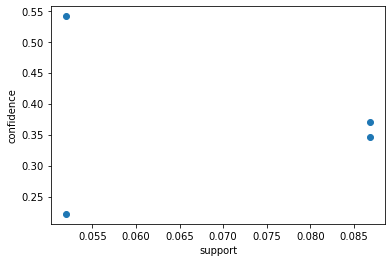

In [21]:
x, y = draw(day_rules)
plt.xlabel('support') 
plt.ylabel('confidence') 
plt.scatter(x, y)
plt.show()

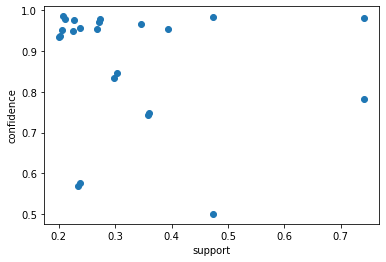

In [22]:
x, y = draw(month_rules)
plt.xlabel('support') 
plt.ylabel('confidence')  
plt.scatter(x, y)
plt.show()

### Lift & Support

In [23]:
def draw(lifts, rules):
    x = []
    y = []
    for lift in lifts:
        x.append(lift[2])
    for rule in rules:
        y.append(rule[2])  # sup
    return x, y

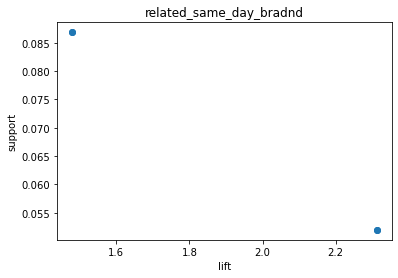

In [24]:
x, y = draw(day_lifts, day_rules)
plt.title('related_same_day_bradnd')
plt.xlabel('lift') 
plt.ylabel('support')  
plt.scatter(x, y)
plt.show()

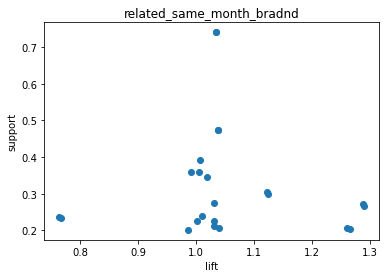

In [25]:
x, y = draw(month_lifts, month_rules)
plt.title('related_same_month_bradnd')
plt.xlabel('lift') 
plt.ylabel('support')  
plt.scatter(x, y)
plt.show()